In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import importlib
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

import Transformer as tnsf
import utils as ad

importlib.reload(tnsf)
importlib.reload(ad)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [57]:
pd.options.display.width = 400
pd.options.display.max_colwidth = 400

In [60]:
#Parse from file
log_file  = 'HDFS.log'
log_source  = 'HDFS'
algorithm = 'Spell'
ad.parse(log_source, log_file, algorithm, labeled = False)

Processed 100.0% of log lines.
Parsing done. [Time taken: 0:00:15.720655]


In [61]:
# show first 10 lines of log file
N = 10
with open("Dataset/HDFS/HDFS.log") as file:
    for i in range(N): print(next(file).strip())

081109 203518 143 INFO dfs.DataNode$DataXceiver: Receiving block blk_-1608999687919862906 src: /10.250.19.102:54106 dest: /10.250.19.102:50010
081109 203518 35 INFO dfs.FSNamesystem: BLOCK* NameSystem.allocateBlock: /mnt/hadoop/mapred/system/job_200811092030_0001/job.jar. blk_-1608999687919862906
081109 203519 143 INFO dfs.DataNode$DataXceiver: Receiving block blk_-1608999687919862906 src: /10.250.10.6:40524 dest: /10.250.10.6:50010
081109 203519 145 INFO dfs.DataNode$DataXceiver: Receiving block blk_-1608999687919862906 src: /10.250.14.224:42420 dest: /10.250.14.224:50010
081109 203519 145 INFO dfs.DataNode$PacketResponder: PacketResponder 1 for block blk_-1608999687919862906 terminating
081109 203519 145 INFO dfs.DataNode$PacketResponder: PacketResponder 2 for block blk_-1608999687919862906 terminating
081109 203519 145 INFO dfs.DataNode$PacketResponder: Received block blk_-1608999687919862906 of size 91178 from /10.250.10.6
081109 203519 145 INFO dfs.DataNode$PacketResponder: Receiv

In [14]:
log_structured = pd.read_csv("Drain_result/" +  "HDFS_templates.csv") 
log_structured

,EventId,EventTemplate
0,E1,<*>Adding an already existing block<*>
1,E2,<*>Verification succeeded for<*>
2,E3,<*>Served block<*>to<*>
3,E4,<*>Got exception while serving<*>to<*>
4,E5,<*>Receiving block<*>src:<*>dest:<*>
5,E6,<*>Received block<*>src:<*>dest:<*>of size<*>
6,E7,<*>writeBlock<*>received exception<*>
7,E8,<*>PacketResponder<*>for block<*>Interrupted<*>
8,E9,<*>Received block<*>of size<*>from<*>
9,E10,<*>PacketResponder<*>Exception<*>


In [16]:
# show first 10 log keys sequences
N = 10
with open("Dataset/HDFS/hdfs_train") as file:  # the a opens it in append mode
    for i in range(N): print(next(file).strip())

5 5 5 22 11 9 11 9 11 9 26 26 26 23 23 23 21 21 21
22 5 5 5 11 9 11 9 11 9 26 26 26
22 5 5 5 26 26 26 11 9 11 9 11 9 2 3 23 23 23 21 21 21
22 5 5 5 11 9 11 9 11 9 26 26 26
22 5 5 5 26 26 26 11 9 11 9 11 9 4 3 3 3 4 3 4 3 3 4 3 3 23 23 23 21 21 21
22 5 5 5 26 26 26 11 9 11 9 11 9 3 3 4 3 4 3 3 3 4 4 3 3 23 23 23 21 21 21
5 22 5 5 26 26 11 9 11 9 11 9 26 23 23 23 21 21 21
22 5 5 5 26 26 26 11 9 11 9 11 9 4 4 3 2 23 23 23 21 21 21
5 22 5 5 11 9 11 9 11 9 26 26 26 23 23 23 21 21 21
5 5 5 22 11 9 11 9 11 9 26 26 26 23 23 23 21 21 21


In [19]:
importlib.reload(tnsf)
# Centralized model training
model = tnsf.train(N=2, d_model=512, d_ff=2048, h=4, dropout=0.1)

# Federated model training
# federated_model = tnsf.federated_training(rounds = 1, clients = 2, N=2, d_model=512, d_ff=2048, h=4, dropout=0.1)

2 512 2048 4 0.1
Epoch Step: 1 Loss: 3.835754 Tokens per Sec: 706.330017
Epoch Step: 1 Loss: 0.429255 Tokens per Sec: 1224.489990
tensor(0.4293)
Epoch Step: 1 Loss: 0.586702 Tokens per Sec: 688.526123
Epoch Step: 1 Loss: 0.195648 Tokens per Sec: 993.223450
tensor(0.1956)
Epoch Step: 1 Loss: 0.369800 Tokens per Sec: 639.788330
Epoch Step: 1 Loss: 0.251983 Tokens per Sec: 1364.580322
tensor(0.2520)
Epoch Step: 1 Loss: 0.960734 Tokens per Sec: 757.712585
Epoch Step: 1 Loss: 0.177892 Tokens per Sec: 1197.208740
tensor(0.1779)
Epoch Step: 1 Loss: 0.192082 Tokens per Sec: 731.324829
Epoch Step: 1 Loss: 0.297957 Tokens per Sec: 1187.613647
tensor(0.2980)
Epoch Step: 1 Loss: 0.723444 Tokens per Sec: 842.353516
Epoch Step: 1 Loss: 0.232099 Tokens per Sec: 1506.776001
tensor(0.2321)
Epoch Step: 1 Loss: 0.231169 Tokens per Sec: 704.539490
Epoch Step: 1 Loss: 0.207786 Tokens per Sec: 1295.515991
tensor(0.2078)
Epoch Step: 1 Loss: 0.230873 Tokens per Sec: 714.459473
Epoch Step: 1 Loss: 0.171194 Tok

In [13]:
importlib.reload(tnsf)

#Testing model
tnsf.test(model)

553366
553366
16838
16838
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
True positive (TP): 10000, true negative (TN): 9946, false positive (FP): 54, false negative (FN): 0, Accuracy: 99.730%, Precision: 99.463%, Recall: 100.000%, F1-measure: 99.731%
elapsed_time: 513.127s


In [20]:
#Create sequences of 10 log keys
WINDOW_SIZE = 10

#Number of log templates
VOCAB_SIZE = 29

In [23]:
# Load model 
model = torch.load("Model/models.pt")

model.eval()
sent = [22, 5, 5, 5, 26, 26, 26, 11, 9, 11]

src_mask = Variable(torch.ones(1, 1, WINDOW_SIZE+1) )
t1 = torch.from_numpy(np.zeros((1,WINDOW_SIZE+1),dtype=int))

t1[0][1:WINDOW_SIZE+1] = torch.tensor(sent, dtype=torch.float).to(device)
t1[0][0]=1

src = Variable(t1, requires_grad=False)

tgt_sent = tnsf.greedy_decode(model, src, src_mask, 0, max_len=WINDOW_SIZE+1, start_symbol=1, pred=False) 

TypeError: greedy_decode() missing 1 required positional argument: 'g'

In [9]:
tgt_sent = np.reshape(tgt_sent.numpy(), (11,))
tgt_sent = list(tgt_sent)
sent = list(np.reshape(src.numpy(), (11,)))

In [10]:
def draw(data, x, y, ax):
    seaborn.heatmap(data, xticklabels=x, square=True, yticklabels=y, vmin=0.0, vmax=1.0,cbar=False, ax=ax)

Encoder Layer 2


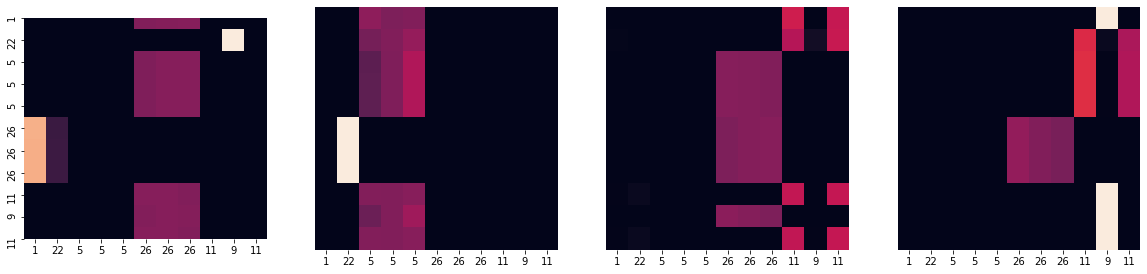

Encoder Layer 4


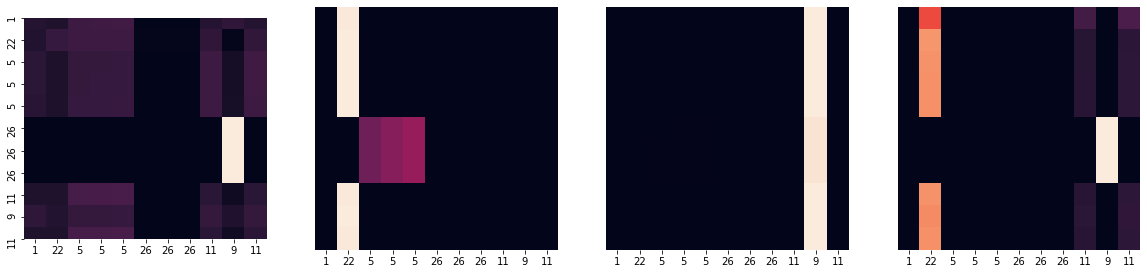

Decoder Self Layer 2


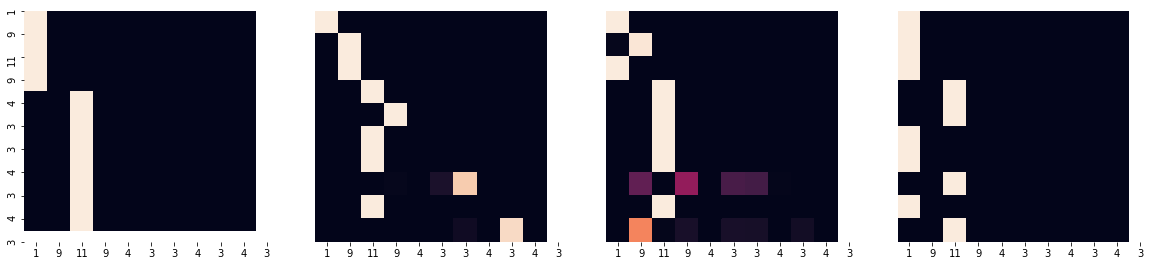

Decoder Src Layer 2


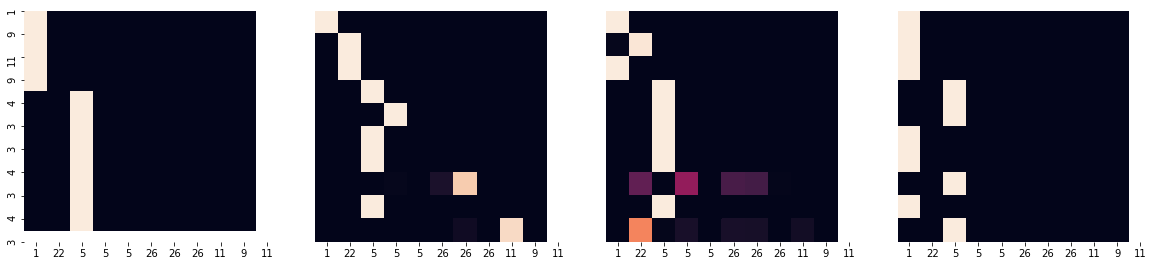

Decoder Self Layer 4


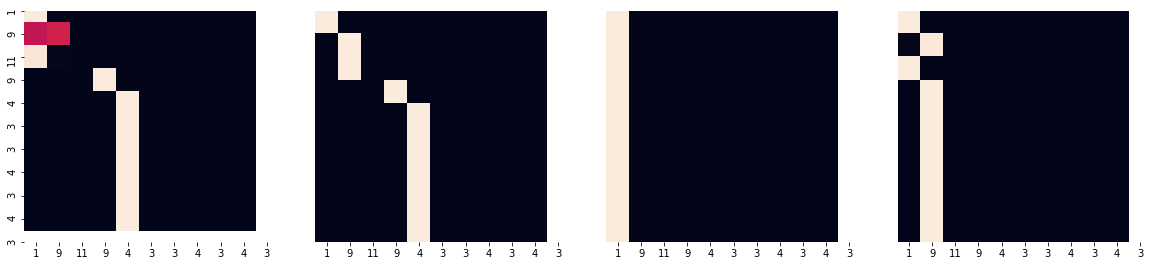

Decoder Src Layer 4


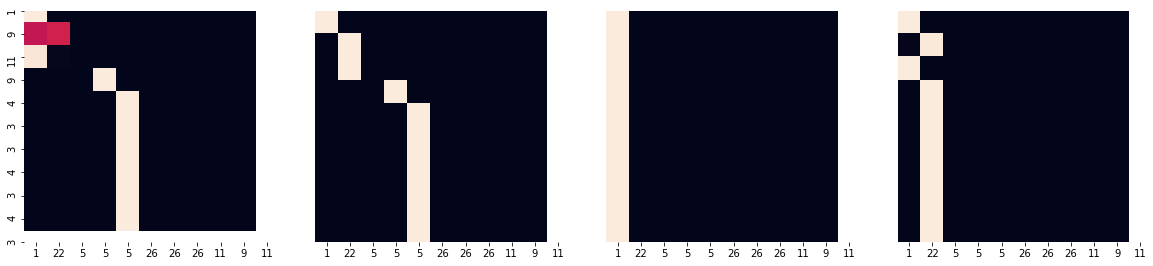

In [62]:
for layer in range(1, 4, 2):
    fig, axs = plt.subplots(1,4, figsize=(20, 10))
    print("Encoder Layer", layer+1)
    for h in range(4):
        draw(model2.encoder.layers[layer].self_attn.attn[0, h].data, 
            sent, sent if h ==0 else [], ax=axs[h])
    plt.show()
    
for layer in range(1, 4, 2):
    fig, axs = plt.subplots(1,4, figsize=(20, 10))
    print("Decoder Self Layer", layer+1)
    for h in range(4):
        draw(model2.decoder.layers[layer].self_attn.attn[0, h].data[:len(tgt_sent), :len(tgt_sent)], 
            tgt_sent, tgt_sent if h ==0 else [], ax=axs[h])
    plt.show()
    print("Decoder Src Layer", layer+1)
    fig, axs = plt.subplots(1,4, figsize=(20, 10))
    for h in range(4):
        draw(model2.decoder.layers[layer].self_attn.attn[0, h].data[:len(tgt_sent), :len(sent)], 
            sent, tgt_sent if h ==0 else [], ax=axs[h])
    plt.show()

In [58]:
# Model size
# parameters = 0
# for k, v in model2.items():
#     if len(model0[k].size()) == 1:
#         parameters += model0[k].size()[0]
#     elif len(model0[k].size()) == 2:        
#         parameters += model0[k].size()[0]*model0[k].size()[1]
#     else:         
#         parameters += model0[k].size()[0]*model0[k].size()[1]*model0[k].size()[2]
# print(parameters)

## Sample

In [9]:
importlib.reload(tnsf)

t2 = torch.from_numpy(np.zeros((1,WINDOW_SIZE+1),dtype=int))

tgt = [9, 11, 9, 2, 3, 4, 3, 2, 3, 4]
t2[0][0:len(tgt)] = torch.tensor(tgt, dtype=torch.float).to(device)
tgt = Variable(t2, requires_grad=False)

pred = tnsf.greedy_decode(model2, src, src_mask, tgt, max_len=WINDOW_SIZE+1, start_symbol=1, pred=True) 

print(tgt)
print(pred,"\n")

if -1 in pred:
    print("Abnormal: false positive")
else:
    print("Normal: true negative")

Incoming log: tensor(9)
Candidate logs: tensor([ 2,  6,  4,  3, 21, 23, 26, 11,  9]) 

Incoming log: tensor(11)
Candidate logs: tensor([15, 25, 23,  2,  6, 26,  3,  9, 11]) 

Incoming log: tensor(9)
Candidate logs: tensor([15, 25, 21,  4,  6,  3, 23, 11,  9]) 

Incoming log: tensor(2)
Candidate logs: tensor([15, 14, 21,  9, 23, 26,  3,  2,  4]) 

Incoming log: tensor(3)
Candidate logs: tensor([ 6,  2,  4, 26, 21,  9, 23, 11,  3]) 

Incoming log: tensor(4)
Candidate logs: tensor([20, 11, 26,  9,  2,  4,  3, 21, 23]) 

Incoming log: tensor(3)
Candidate logs: tensor([ 6,  9, 11, 26, 23,  2,  4, 21,  3]) 

Incoming log: tensor(2)
Candidate logs: tensor([20, 11, 26,  9,  4,  2, 21,  3, 23]) 

Incoming log: tensor(3)
Candidate logs: tensor([20, 11,  4,  2,  9, 26,  3, 21, 23]) 

Incoming log: tensor(4)
Candidate logs: tensor([20, 11, 26,  9, 21,  4,  2,  3, 23]) 

tensor([[ 9, 11,  9,  2,  3,  4,  3,  2,  3,  4,  0]])
tensor([[ 1,  9, 11,  9,  2,  3,  4,  3,  2,  3,  4]]) 

Normal: true nega

In [28]:
importlib.reload(tnsf)
sent = [5, 5, 5, 22, 11, 9, 11, 9, 26, 11]
tgt = [9, 26, 26, 27, 23, 23, 23, 21, 21, 21 ]

t1 = torch.from_numpy(np.zeros((1,WINDOW_SIZE+1),dtype=int))

t1[0][1:WINDOW_SIZE+1] = torch.tensor(sent, dtype=torch.float).to(device)
t1[0][0]=1

src = Variable(t1, requires_grad=False)
t2[0][0:len(tgt)] = torch.tensor(tgt, dtype=torch.float).to(device)
tgt = Variable(t2, requires_grad=False)

pred = tnsf.greedy_decode(model2, src, src_mask, tgt, max_len=WINDOW_SIZE+1, start_symbol=1, pred=True) 

print(src)
print(pred,"\n")

if -1 in pred:
    print("Normal: true positive")
else:
    print("Abnormal: false negative")

Incoming log: tensor(9)
Candidate logs: tensor([ 2,  6,  4,  3, 21, 23, 26, 11,  9]) 

Probabilities?: tensor([[0, 0, 0,  ..., 0, 0, 0]]) 

Incoming log: tensor(26)
Candidate logs: tensor([15, 25,  2, 23,  6, 26,  3,  9, 11]) 

Probabilities?: tensor([[1, 1, 1,  ..., 1, 1, 0],
        [0, 0, 0,  ..., 0, 0, 1]]) 

Incoming log: tensor(26)
Candidate logs: tensor([ 6,  4,  2,  3, 26, 11,  9, 21, 23]) 

Probabilities?: tensor([[1, 1, 1,  ..., 1, 1, 2],
        [0, 0, 0,  ..., 2, 0, 0],
        [2, 2, 2,  ..., 0, 2, 1]]) 

Incoming log: tensor(27)
Candidate logs: tensor([20,  2,  4,  3, 11, 26,  9, 21, 23]) 

Probabilities?: tensor([[1, 1, 1,  ..., 1, 1, 3],
        [0, 0, 0,  ..., 2, 0, 2],
        [3, 3, 2,  ..., 3, 2, 0],
        [2, 2, 3,  ..., 0, 3, 1]]) 

tensor([[ 1,  5,  5,  5, 22, 11,  9, 11,  9, 26, 11]])
tensor([[ 1,  9, 26, 26, 27, -1]]) 

Normal: true positive


In [110]:
log_template = pd.read_csv("Drain_result/HDFS_templates.csv") 
log_template

,EventId,EventTemplate
0,E1,<*>Adding an already existing block<*>
1,E2,<*>Verification succeeded for<*>
2,E3,<*>Served block<*>to<*>
3,E4,<*>Got exception while serving<*>to<*>
4,E5,<*>Receiving block<*>src:<*>dest:<*>
5,E6,<*>Received block<*>src:<*>dest:<*>of size<*>
6,E7,<*>writeBlock<*>received exception<*>
7,E8,<*>PacketResponder<*>for block<*>Interrupted<*>
8,E9,<*>Received block<*>of size<*>from<*>
9,E10,<*>PacketResponder<*>Exception<*>


In [123]:
importlib.reload(tnsf)
global_model = tnsf.train(Federated = True, N=2, clients=4, d_model=512, d_ff=2048, h=4, dropout=0.1)

  0%|          | 0/1 [00:00<?, ?it/s]

2 512 2048 4 0.1

 | Global Training Round : 1 |

Client: 3
Epoch Step: 1 Loss: 3.954712 Tokens per Sec: 639.768494
Epoch Step: 1 Loss: 0.400021 Tokens per Sec: 1365.889160
tensor(0.4000)
Epoch Step: 1 Loss: 0.445543 Tokens per Sec: 703.602295
Epoch Step: 1 Loss: 0.166760 Tokens per Sec: 1194.379883
tensor(0.1668)
Epoch Step: 1 Loss: 0.252805 Tokens per Sec: 696.037842
Epoch Step: 1 Loss: 0.129374 Tokens per Sec: 1503.415649
tensor(0.1294)
Epoch Step: 1 Loss: 0.262660 Tokens per Sec: 707.066589
Epoch Step: 1 Loss: 0.081507 Tokens per Sec: 1156.764404
tensor(0.0815)
Epoch Step: 1 Loss: 0.166875 Tokens per Sec: 694.853394
Epoch Step: 1 Loss: 0.072039 Tokens per Sec: 1063.360474
tensor(0.0720)
Epoch Step: 1 Loss: 0.078989 Tokens per Sec: 526.267639
Epoch Step: 1 Loss: 0.071354 Tokens per Sec: 852.175415
tensor(0.0714)
Epoch Step: 1 Loss: 0.087261 Tokens per Sec: 464.088287
Epoch Step: 1 Loss: 0.319261 Tokens per Sec: 775.874207
tensor(0.3193)
Epoch Step: 1 Loss: 1.775642 Tokens per Sec: 4

100%|██████████| 1/1 [02:11<00:00, 131.44s/it]


In [126]:
importlib.reload(tnsf)
tnsf.test(global_model)

553366
553366
16838
16838
0
1000
2000
3000
4000
0
1000
2000
3000
4000
True positive (TP): 4377, true negative (TN): 4977, false positive (FP): 23, false negative (FN): 623, Accuracy: 93.540%, Precision: 99.477%, Recall: 87.540%, F1-measure: 93.128%
elapsed_time: 261.250s
